# Demandes d'accès à l'information au fédéral

Ce carnet permet de lire et d'analyser les données contenues dans un fichier CSV. Ces données portent sur les demandes d'accès à l'information déposées auprès du gouvernement du Canada depuis 2015. Le fichier fournit plusieurs informations sur ces quelques 28 000 demandes d'accès à l'information : année, mois, numéro de requête, résumé en anglais, résumé en français, état, nombre de pages, l'acronyme de du ministère ou de l'agence gouvernementale à qui a été déposée la demande et le nom complet de ce ministère ou de cette agence. 

Dans ce carnet, voici les actions qui seront effectuées : 
1) Lire le fichier CSV
2) Regarder ce que contient le fichier CSV
3) Identifier le nombre de pages maximum et minimum, qui a été fourni par le gouvernement du Canada dans le cadre d'une demande d'accès à l'information depuis 2015
4) Identifier combien de demandes d'accès à l'information ont été déposées auprès du gouvernement du Canada par année, depuis 2015. Puis, identifier le pourcentage de demande reçu en fonction de la période de l'année, soit le mois.
5) Identifier l'état (disposition) des demandes d'accès à l'information du ministère ou de l'agence gouvernementale, qui a reçu le plus de demandes depuis 2015. 
6) Identifier le nombre de pages qui ont été fournies suite aux demandes d'information déposées au ministère ou à l'agence gouvernementale qui a reçu le plus de demandes en 2015 (notamment pour savoir combien en ont reçu 0)?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mp

Changer les options d'affichage de Pandas (pas en notation scientifique)

In [2]:
pd.set_option("display.float_format", lambda x : "%.2f" % x)

Lire le fichier CSV que l'on souhaite analyser. 

In [5]:
demandes = pd.read_csv("ati.csv")

D'abord, pour avoir une idée de ce que contient le document, on affiche le contenu de la variable «demandes». 

In [6]:
demandes

,year,month,request_number,summary_en,summary_fr,disposition,pages,owner_org,owner_org_title
0,2016,3,A-2015-00070,Provide a copy of the Transitional Briefing Bo...,Fournir une copie du document d'information su...,Disclosed in part / Communication partielle,563,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
1,2015,4,A-2015-00001,Briefing notes or memoranda submitted January ...,Notes d'information ou notes de service présen...,No records exist / Aucun document existant,0,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
2,2015,4,A-2014-00219,"Please provide from January 1, 2013 to present...","Dossiers, incluant les rapports, sur les pesti...",No records exist / Aucun document existant,0,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
3,2015,4,A-2014-00218,All Temporary Help Services (THS) Supply Arran...,Toutes les commandes subséquentes aux arrangem...,Disclosed in part / Divulgués en partie,14,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
4,2015,4,A-2014-00217,All Task Based Professional Services (TSPS) an...,Toutes les commandes subséquentes à un arrange...,No records exist / Aucun document existant,0,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
5,2015,4,A-2014-00216,Please provide all ProServices contracts issue...,Tous les contrats de services professionnels c...,Disclosed in part / Divulgués en partie,69,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
6,2015,4,A-2014-00214,A list of all briefing material provided to th...,Liste de toutes les notes d'information présen...,Disclosed in part / Divulgués en partie,3,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
7,2015,4,A-2014-00210,"Briefing material to the deputy minister, DMM ...",Matériel d'information au sous-ministre (DMM 2...,All excluded / Tous exclus,0,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
8,2015,4,A-2014-00213,A list of all briefing material provided to th...,Liste de toutes les notes d'information présen...,Disclosed in part / Divulgués en partie,4,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...
9,2015,6,A-2015-00012,Seeking a copy of the Environmental Assessment...,"Copie de l'évaluation environnementale, versio...",Disclosed in part / Communication partielle,37,aafc-aac,Agriculture and Agri-Food Canada | Agriculture...


Puis, toujours pour avoir une meilleure idée de ce que contient le document, on compte combien il y a d'éléments dans chacune des colonnes. 

In [7]:
demandes.count()

year               28761
month              28761
request_number     28748
summary_en         28741
summary_fr         28667
disposition        28740
pages              28761
owner_org          28761
owner_org_title    28761
dtype: int64

PREMIÈRE INFORMATION : quel est le nombre de pages maximum et minimum, qui a été fourni par le gouvernement du Canada dans le cadre d'une demande d'accès à l'information depuis 2015 ?

In [10]:
demandes.pages.max()

2435124351

In [11]:
demandes.pages.min()

0

DEUXIÈME INFORMATION : D'abord, combien de demandes d'accès à l'information ont été déposées auprès du gouvernement du Canada par année, depuis 2015 ? Puis, quel est le pourcentage de demande reçu en fonction de la période de l'année, soit le mois ?

In [52]:
demandes.year.value_counts()

2016    15016
2015    12630
2017     1115
Name: year, dtype: int64

**On remarque, qu'il y a eu plus de demandes d'accès à l'information traitées en 2016, qu'en 2015 (soit une différence de 2 386) 

On peut maintenant mettre cette information dans un tableau. 

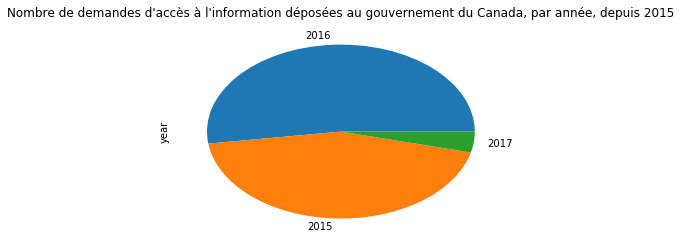

In [57]:
demandes.year.value_counts().plot(kind="pie",title="Nombre de demandes d'accès à l'information déposées au gouvernement du Canada, par année, depuis 2015")

Maintenant, on calcule le pourcentage de demandes reçues en fonction de la période de l'année, soit le mois. 

In [50]:
demandes.month.value_counts() / len(demandes.month)*100

6    9.45
3    9.21
5    9.08
7    9.04
9    8.97
10   8.82
11   8.71
12   8.55
8    8.28
4    8.05
1    6.78
2    4.90
0    0.15
13   0.00
55   0.00
Name: month, dtype: float64

** On remaque que le % de demande est un peu moins élevé au mois de janvier (6,78%) et au mois de février (4,90%). Sinon, les pourcentages sont relativement les mêmes. 

**Certains chiffres ne correspondent pas à des mois (0,13 et 55), il aurait peut-être fallu nettoyer les données avant de les traiter. 

TROISIÈME INFORMATION : Quel est l'état (disposition) des demandes d'accès à l'information du ministère ou de l'agence gouvernementale, qui a reçu le plus de demandes depuis 2015 ?

D'abord, on compte combien de fois revient l'abréviation de chacun des ministères et agences gouvernementales qui ont reçu des demandes d'accès à l'information depuis 2015. 

In [37]:
demandes.owner_org.value_counts()

dnd-mdn         2605
dfatd-maecd     1650
esdc-edsc       1541
cic             1323
hc-sc           1164
rcmp-grc        1121
pwgsc-tpsgc     1116
cra-arc         1046
tc              1026
fin             1011
pco-bcp          997
aandc-aadnc      911
lac-bac          897
ic               893
cbsa-asfc        872
nrcan-rncan      783
jus              737
dfo-mpo          713
pch              637
ps-sp            627
ec               616
tbs-sct          578
cfia-acia        498
csc-scc          420
vac-acc          372
ssc-spc          346
csis-scrs        335
infc             283
cnsc-ccsn        254
aafc-aac         245
                ... 
wd-deo            14
jccbi-pjcci       12
ocl-cal           12
cannor            11
pmprb-cepmb       11
vrab-tacra        10
bdc                9
pspib-oirpsp       8
petf-fpet          7
fcac-acfc          7
cpc-cpp            7
wdba-apwd          7
prpa-appr          5
erc-cee            4
cdic-sadc          4
mgerc-ceegm        3
psic-ispc    

** On constate que dnd-mdn (ministère de la Défense nationale) revient le plus de fois, soit 2605 fois.

On créé donc une variable, dans laquelle on met simplement les demandes d'accès à l'information déposées auprès du ministère de la Défense nationale. 

In [39]:
defense = demandes.owner_org == "dnd-mdn"

On affiche le sous-ensemble «défense» pour voir ce qu'il contient. 

In [41]:
demandes[defense]

,year,month,request_number,summary_en,summary_fr,disposition,pages,owner_org,owner_org_title
9067,2016,10,A-2016-00992,"MND2016-1085651, on the RMC","MND2016-1085651, sur le CMR",All disclosed / Communication totale,7,dnd-mdn,National Defence | Défense nationale
9068,2015,7,A-2013-00152,Documents gathered to brief the Associate Mini...,Les documents rassemblés pour informer la mini...,Disclosed in part / Communication partielle,1223,dnd-mdn,National Defence | Défense nationale
9069,2015,10,A-2015-00418,Briefing note: CJOC2014-988001 - Inherent Resolve,Note de synthèse : CJOC2014-988001 — Inherent ...,Disclosed in part / Communication partielle,3,dnd-mdn,National Defence | Défense nationale
9070,2015,6,A-2015-00532,All records of communication written by or rec...,Tous les dossiers de communications écrites ou...,Does not exist / Aucun document existe,0,dnd-mdn,National Defence | Défense nationale
9071,2015,8,A-2015-00662,All call-ups under a Standing Offer for tempor...,Toutes les commandes subséquentes à une Offre ...,Disclosed in part / Communication partielle,46,dnd-mdn,National Defence | Défense nationale
9072,2015,8,A-2015-00663,All call-ups under a Standing Offer for tempor...,Toutes les commandes subséquentes à une Offre ...,Disclosed in part / Communication partielle,41,dnd-mdn,National Defence | Défense nationale
9073,2015,8,A-2015-00664,All call-ups under a Standing Offer for tempor...,Toutes les commandes subséquentes à une Offre ...,Disclosed in part / Communication partielle,99,dnd-mdn,National Defence | Défense nationale
9074,2015,8,A-2015-00665,All call-ups under a Standing Offer for tempor...,Toutes les commandes subséquentes à une Offre ...,Disclosed in part / Communication partielle,139,dnd-mdn,National Defence | Défense nationale
9075,2015,7,A-2013-00801,All briefing notes and memoranda related to Se...,Toutes les notes de synthèse et les notes de s...,Disclosed in part / Communication partielle,264,dnd-mdn,National Defence | Défense nationale
9076,2016,12,A-2016-00480,All records contained in A-2016-00352,Tous les documents du dossier A-2016-00352.,Disclosed in part / Communication partielle,6,dnd-mdn,National Defence | Défense nationale


On compte maintenant le nombre de demandes en fonction de l'état (disposition) de chacune des demandes. 

In [61]:
demandes[defense].disposition.value_counts()

Disclosed in part / Communication partielle     1351
All disclosed / Communication totale             522
Does not exist / Aucun document existe           458
Disclosed in part / Communication Partielle       84
Nothing disclosed (excluded) / Tous exclus        37
All disclosed / Communication Totale              30
Nothing disclosed (exemption) / Tous exempté      29
All disclosed / Communiation totale               28
Does not exist / Aucun Document Existe            27
Does not exist Aucun document existe              26
Nothing disclosed (exemption) / Tous exempé        9
Nothing disclosed (exemption) / Tous Exempté       2
Nothing disclosed (exemption) / Tous exclus        2
Name: disposition, dtype: int64

** On constate que certains états de la demande se retrouvent plus d'une fois dans la liste, mais écrits d'une manière différente. Par exemple: «Disclosed in part / Communication partielle» et « Disclosed in part / Communication Partielle». Il serait préférable d'effectuer un nettoyage des données avec OpenRefine, avant d'utiliser Pandas. 

Lorsqu'on les regroupe, ça donne :
- Disclosed in part / Communication partielle : 1435
- All disclosed / Communication totale : 580
- Does not exist / Aucun document existe : 511
- Nothing disclosed (excluded) / Tous exclus : 79

On remarque que la grande majorité des demandes d'accès à l'information déposées au ministère de la Défense nationale (1435) ont le statut « Disclosed in part / Communication partielle». 

QUATRIÈME INFORMATION: Combien de pages ont été fournies suite aux demandes d'information déposées au ministère ou à l'agence gouvernementale qui a reçu le plus de demandes en 2015, soit le ministère de la Défense nationale ?

In [60]:
demandes[defense].pages.value_counts()

0       611
2       202
1       200
3       131
4        92
6        63
5        63
7        49
8        42
10       37
9        29
13       28
17       22
14       22
11       22
16       19
23       17
15       17
18       16
25       16
36       15
24       15
33       14
21       14
12       14
38       13
20       13
50       12
19       12
29       10
       ... 
193       1
197       1
203       1
209       1
4311      1
219       1
2272      1
2300      1
257       1
265       1
163       1
157       1
1472      1
155       1
3775      1
1730      1
3804      1
1887      1
2106      1
91        1
105       1
111       1
113       1
117       1
135       1
137       1
141       1
143       1
151       1
1935      1
Name: pages, dtype: int64

**On constate que 611 demandes ont reçu 0 page d'information.